In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

/home/nitesh/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [3]:
mnist = fetch_openml('mnist_784', version = 1)


In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
mnist["categories"]

In [13]:
X,y = mnist['data'], mnist['target']

In [14]:
X.shape

(70000, 784)

In [15]:
type(X)

pandas.core.frame.DataFrame

In [16]:
type(y)

pandas.core.series.Series

In [17]:
y.shape

(70000,)

In [18]:
y[0]

'5'

In [20]:
X = X.to_numpy()

In [ ]:
X[0]

In [22]:
import matplotlib as mpl

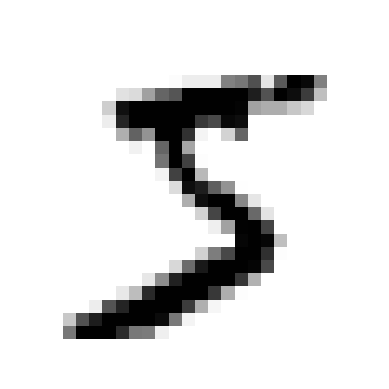

In [23]:
some_digit = X[0]
some_digit_reshaped = some_digit.reshape(28,28)
plt.imshow(some_digit_reshaped, cmap = 'binary')
plt.axis('off')
plt.show()

In [24]:
y[0]

'5'

In [25]:
type(y[0])

str

In [27]:
y = y.astype(np.uint8)

In [28]:
y[0]

5

In [29]:
type(y[0])

numpy.uint8

In [30]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [31]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [32]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train , y_train_5)

SGDClassifier(random_state=42)

In [33]:
sgd_clf.predict([some_digit])

array([ True])

In [41]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    clone_clf.fit(X_train_folds , y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred==y_test_folds)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv = 3, scoring = "accuracy")


array([0.95035, 0.96035, 0.9604 ])

In [45]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype = bool)
    
    

In [48]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf , X_train, y_train_5, cv = 5, scoring = "accuracy")

array([0.91266667, 0.90866667, 0.9095    , 0.90883333, 0.90858333])

In [59]:
from sklearn.model_selection import cross_val_predict
y_train_predict = cross_val_predict(sgd_clf , X_train, y_train_5 , cv=3)

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_predict)

array([[53892,   687],
       [ 1891,  3530]])

In [61]:
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_5 , y_train_perfect_prediction)

array([[54579,     0],
       [    0,  5421]])

In [66]:
from sklearn.metrics import precision_score, recall_score


In [67]:
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [68]:
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [69]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.7325171197343846

In [70]:
y_score = sgd_clf.decision_function([some_digit])

In [71]:
y_score

array([2164.22030239])

In [72]:
threshold = 0
y_some_digit = (y_score>threshold)

In [73]:
y_some_digit

array([ True])

In [74]:
threshold = 8000


In [75]:
y_some_digit_pred = (y_score>threshold)
y_some_digit_pred

array([False])

In [76]:
y_scores = cross_val_predict(sgd_clf , X_train, y_train_5 , cv = 3, method = "decision_function")

In [77]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_train_5, y_scores)

In [78]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

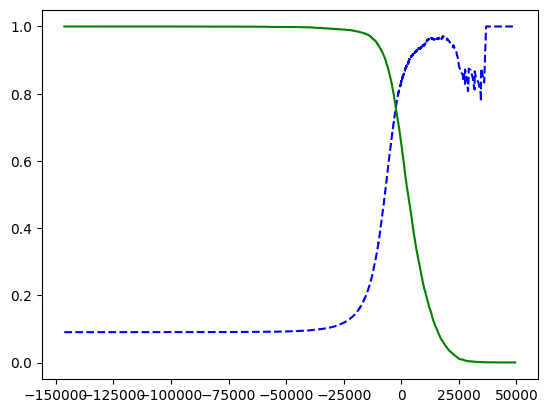

In [80]:
plot_precision_recall_vs_threshold(precision, recall, threshold)
plt.show()

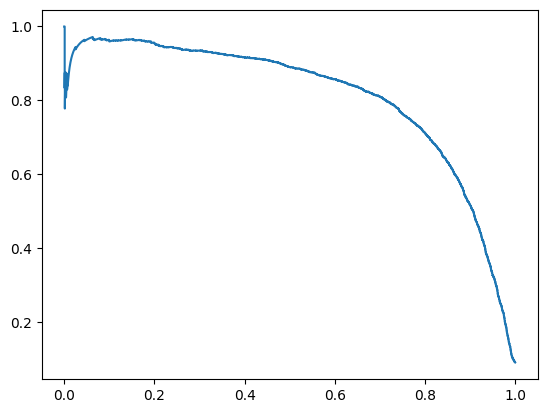

In [81]:
plt.plot(recall, precision)

In [87]:
threshold_99_precision = threshold[np.argmax(precision>=0.99)]

In [88]:
threshold_99_precision

36801.60697028177

In [90]:
y_train_pred_99 = (y_scores>threshold_99_precision)

In [91]:
precision_score(y_train_5, y_train_pred_99)

1.0

In [92]:
recall_score(y_train_5, y_train_pred_99)

0.0007378712414683637